<a href="https://colab.research.google.com/github/pinjemsendal12/pinjemsendal12.github.io/blob/master/Praktikum_BigData_AnalisisData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm
import matplotlib.pyplot as plt

from scipy.spatial import distance
from sklearn import preprocessing

import time
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/BigData/Food/825210049_HargaPangan.xlsx'
df = pd.read_excel (path,sheet_name='Sheet1')

df.head()



Mounted at /content/drive


,Date,Beras,Telur Ayam,Bawang Merah,Bawang Putih,Minyak Goreng
0,2020-01-01,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,11350.0,24500.0,32000.0,34750.0,13100.0
2,2020-01-03,11350.0,24500.0,31000.0,35000.0,13400.0
3,2020-01-04,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,Beras,Telur Ayam,Bawang Merah,Bawang Putih,Minyak Goreng
count,801.000000,801.000000,801.000000,801.000000,801.000000
mean,11370.037453,24928.089888,33051.747815,34947.815231,16452.933833
std,351.489507,2874.563658,8308.514650,5572.863231,2781.904834
min,10300.000000,18250.000000,20000.000000,29000.000000,12800.000000
25%,11250.000000,23150.000000,28500.000000,32000.000000,14000.000000
50%,11350.000000,24750.000000,30500.000000,33000.000000,16000.000000
75%,11650.000000,27150.000000,34750.000000,37500.000000,18000.000000
max,15650.000000,31500.000000,70000.000000,70000.000000,23850.000000


In [ ]:
df.tail()

,Date,Beras,Telur Ayam,Bawang Merah,Bawang Putih,Minyak Goreng
1303,2023-07-27,NaN,NaN,NaN,NaN,NaN
1304,2023-07-28,NaN,NaN,NaN,NaN,NaN
1305,2023-07-29,NaN,NaN,NaN,NaN,NaN
1306,2023-07-30,NaN,NaN,NaN,NaN,NaN
1307,2023-07-31,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.iloc[0:1186]

In [ ]:
df.isna().sum()/len(df)*100

Date              0.000000
Beras            32.462057
Telur Ayam       32.462057
Bawang Merah     32.462057
Bawang Putih     32.462057
Minyak Goreng    32.462057
dtype: float64

In [ ]:
df = df.ffill()
df = df.bfill()

In [ ]:
df.isna().sum()/len(df)*100

Date             0.0
Beras            0.0
Telur Ayam       0.0
Bawang Merah     0.0
Bawang Putih     0.0
Minyak Goreng    0.0
dtype: float64

In [ ]:
df.head()

,Date,Beras,Telur Ayam,Bawang Merah,Bawang Putih,Minyak Goreng
0,2020-01-01,11350.0,24500.0,32000.0,34750.0,13100.0
1,2020-01-02,11350.0,24500.0,32000.0,34750.0,13100.0
2,2020-01-03,11350.0,24500.0,31000.0,35000.0,13400.0
3,2020-01-04,11350.0,24500.0,31000.0,35000.0,13400.0
4,2020-01-05,11350.0,24500.0,31000.0,35000.0,13400.0


In [ ]:
df.shape

(1186, 6)

In [ ]:
df.head()

,Date,Beras,Telur Ayam,Bawang Merah,Bawang Putih,Minyak Goreng
0,2020-01-01,11350.0,24500.0,32000.0,34750.0,13100.0
1,2020-01-02,11350.0,24500.0,32000.0,34750.0,13100.0
2,2020-01-03,11350.0,24500.0,31000.0,35000.0,13400.0
3,2020-01-04,11350.0,24500.0,31000.0,35000.0,13400.0
4,2020-01-05,11350.0,24500.0,31000.0,35000.0,13400.0


(array([18262., 18383., 18506., 18628., 18748., 18871., 18993., 19113.,
        19236., 19358., 19478.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18383.0, 0, '2020-05'),
  Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05')])

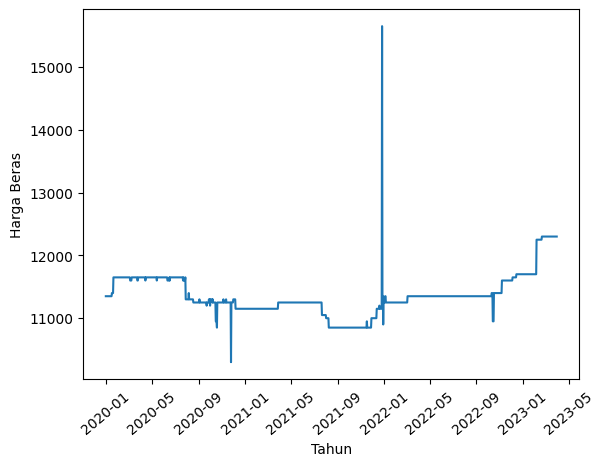

In [ ]:
plt.plot(df['Date'], df['Beras'])
plt.ylabel('Harga Beras')
plt.xlabel('Tahun')
plt.xticks(rotation=40)

(array([18262., 18383., 18506., 18628., 18748., 18871., 18993., 19113.,
        19236., 19358., 19478.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18383.0, 0, '2020-05'),
  Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05')])

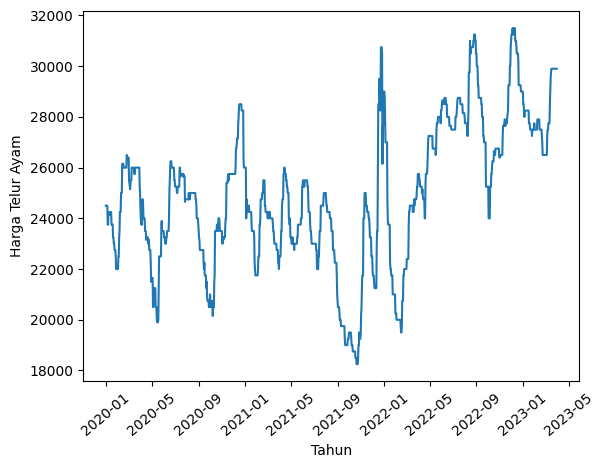

In [ ]:
plt.plot(df['Date'], df['Telur Ayam'])
plt.ylabel('Harga Telur Ayam')
plt.xlabel('Tahun')
plt.xticks(rotation=40)

(array([18262., 18383., 18506., 18628., 18748., 18871., 18993., 19113.,
        19236., 19358., 19478.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18383.0, 0, '2020-05'),
  Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05')])

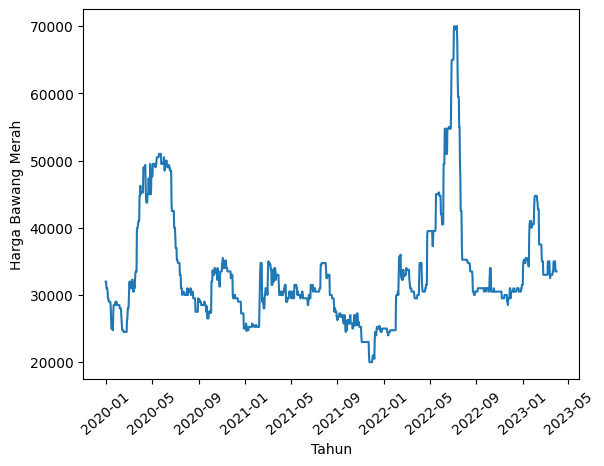

In [ ]:
plt.plot(df['Date'], df['Bawang Merah'])
plt.ylabel('Harga Bawang Merah')
plt.xlabel('Tahun')
plt.xticks(rotation=40)

(array([18262., 18383., 18506., 18628., 18748., 18871., 18993., 19113.,
        19236., 19358., 19478.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18383.0, 0, '2020-05'),
  Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05')])

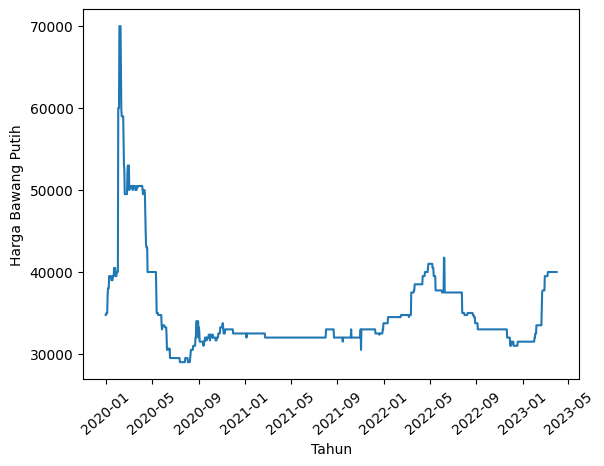

In [ ]:
plt.plot(df['Date'], df['Bawang Putih'])
plt.ylabel('Harga Bawang Putih')
plt.xlabel('Tahun')
plt.xticks(rotation=40)

(array([18262., 18383., 18506., 18628., 18748., 18871., 18993., 19113.,
        19236., 19358., 19478.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18383.0, 0, '2020-05'),
  Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01'),
  Text(19478.0, 0, '2023-05')])

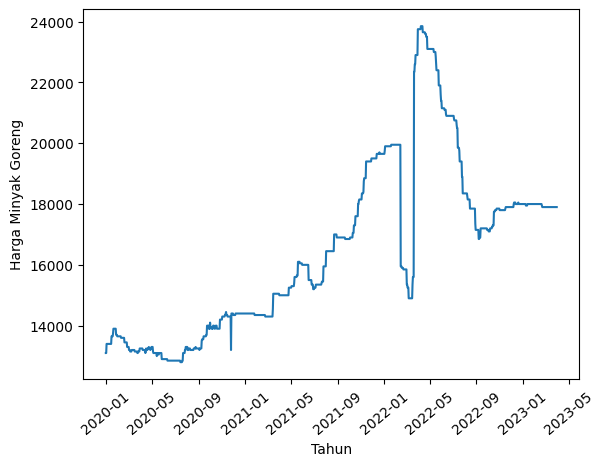

In [ ]:
plt.plot(df['Date'], df['Minyak Goreng'])
plt.ylabel('Harga Minyak Goreng')
plt.xlabel('Tahun')
plt.xticks(rotation=40)

In [ ]:
c = df.corr()
c

<ipython-input-16-ea39ad7b80a4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


,Beras,Telur Ayam,Bawang Merah,Bawang Putih,Minyak Goreng
Beras,1.000000,0.466482,0.332843,0.328205,-0.048792
Telur Ayam,0.466482,1.000000,0.238352,0.094638,0.312717
Bawang Merah,0.332843,0.238352,1.000000,0.177577,0.081086
Bawang Putih,0.328205,0.094638,0.177577,1.000000,-0.007403
Minyak Goreng,-0.048792,0.312717,0.081086,-0.007403,1.000000


Text(0.5, 0, 'Harga Beras')

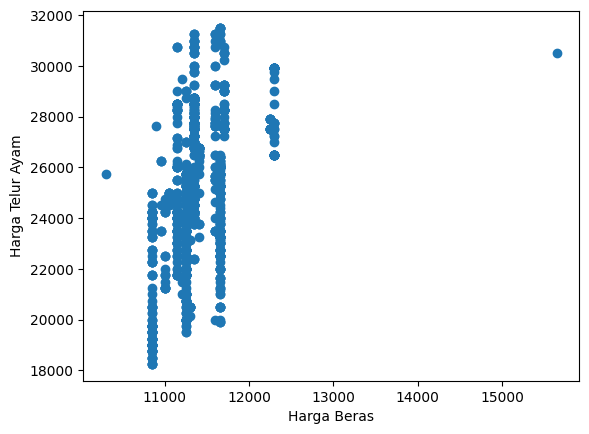

In [ ]:
plt.scatter(df['Beras'], df['Telur Ayam'])
plt.ylabel('Harga Telur Ayam')
plt.xlabel('Harga Beras')

Text(0.5, 0, 'Harga Beras')

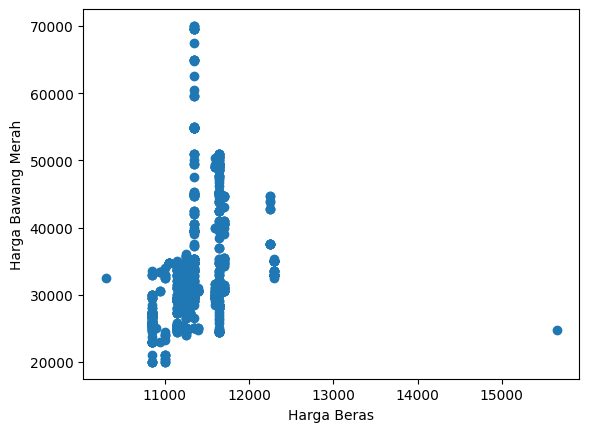

In [ ]:
plt.scatter(df['Beras'], df['Bawang Merah'])
plt.ylabel('Harga Bawang Merah')
plt.xlabel('Harga Beras')

Text(0.5, 0, 'Harga Bawang Putih')

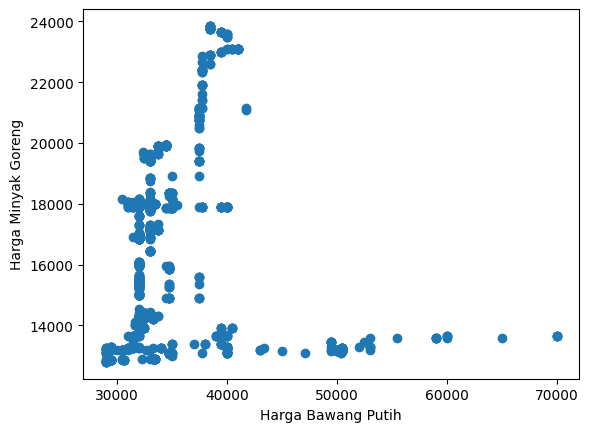

In [ ]:
plt.scatter(df['Bawang Putih'], df['Minyak Goreng'])
plt.ylabel('Harga Minyak Goreng')
plt.xlabel('Harga Bawang Putih')

In [ ]:
df2 = df.drop(['Date'], axis = 1)
df2.head()

,Beras,Telur Ayam,Bawang Merah,Bawang Putih,Minyak Goreng
0,11350.0,24500.0,32000.0,34750.0,13100.0
1,11350.0,24500.0,32000.0,34750.0,13100.0
2,11350.0,24500.0,31000.0,35000.0,13400.0
3,11350.0,24500.0,31000.0,35000.0,13400.0
4,11350.0,24500.0,31000.0,35000.0,13400.0


In [ ]:
df2.describe()

,Beras,Telur Ayam,Bawang Merah,Bawang Putih,Minyak Goreng
count,1186.000000,1186.000000,1186.000000,1186.000000,1186.000000
mean,11363.785835,24936.045531,33180.902192,34970.531197,16452.360877
std,335.371954,2863.305834,8265.366711,5555.297207,2835.460119
min,10300.000000,18250.000000,20000.000000,29000.000000,12800.000000
25%,11250.000000,23000.000000,29000.000000,32000.000000,14000.000000
50%,11350.000000,24750.000000,30575.000000,33000.000000,16000.000000
75%,11600.000000,27250.000000,34750.000000,37500.000000,18000.000000
max,15650.000000,31500.000000,70000.000000,70000.000000,23850.000000


In [ ]:
df['Bulan'] = df['Date'].dt.month
df['Tahun'] = df['Date'].dt.year
df['Hari'] = df['Date'].dt.day_name()
df.to_excel('825210049_HargaPangan.xlsx', 'sheet1')

In [ ]:
df.head()

,Date,Beras,Telur Ayam,Bawang Merah,Bawang Putih,Minyak Goreng,Bulan,Tahun,Hari
0,2020-01-01,11350.0,24500.0,32000.0,34750.0,13100.0,1,2020,Wednesday
1,2020-01-02,11350.0,24500.0,32000.0,34750.0,13100.0,1,2020,Thursday
2,2020-01-03,11350.0,24500.0,31000.0,35000.0,13400.0,1,2020,Friday
3,2020-01-04,11350.0,24500.0,31000.0,35000.0,13400.0,1,2020,Saturday
4,2020-01-05,11350.0,24500.0,31000.0,35000.0,13400.0,1,2020,Sunday


In [ ]:
df.tail()

,Date,Beras,Telur Ayam,Bawang Merah,Bawang Putih,Minyak Goreng,Bulan,Tahun,Hari
1181,2023-03-27,12300.0,29900.0,35000.0,40000.0,17900.0,3,2023,Monday
1182,2023-03-28,12300.0,29900.0,33500.0,40000.0,17900.0,3,2023,Tuesday
1183,2023-03-29,12300.0,29900.0,33500.0,40000.0,17900.0,3,2023,Wednesday
1184,2023-03-30,12300.0,29900.0,33500.0,40000.0,17900.0,3,2023,Thursday
1185,2023-03-31,12300.0,29900.0,33500.0,40000.0,17900.0,3,2023,Friday


In [ ]:
df.iloc[20:30,:]

,Date,Beras,Telur Ayam,Bawang Merah,Bawang Putih,Minyak Goreng,Bulan,Tahun,Hari
20,2020-01-21,11650.0,23250.0,27500.0,39500.0,13900.0,1,2020,Tuesday
21,2020-01-22,11650.0,23000.0,28500.0,39500.0,13900.0,1,2020,Wednesday
22,2020-01-23,11650.0,23000.0,28500.0,40500.0,13900.0,1,2020,Thursday
23,2020-01-24,11650.0,22750.0,28500.0,40500.0,13900.0,1,2020,Friday
24,2020-01-25,11650.0,22750.0,28500.0,40500.0,13900.0,1,2020,Saturday
25,2020-01-26,11650.0,22750.0,28500.0,40500.0,13900.0,1,2020,Sunday
26,2020-01-27,11650.0,22500.0,29000.0,39500.0,13900.0,1,2020,Monday
27,2020-01-28,11650.0,22000.0,28500.0,39500.0,13700.0,1,2020,Tuesday
28,2020-01-29,11650.0,22000.0,29000.0,39500.0,13700.0,1,2020,Wednesday
29,2020-01-30,11650.0,22000.0,28500.0,40000.0,13700.0,1,2020,Thursday


In [ ]:
var = ['Beras','Telur Ayam','Bawang Merah','Bawang Putih','Minyak Goreng','Tahun']
df_temp = df.loc[:, var]
df_temp

,Beras,Telur Ayam,Bawang Merah,Bawang Putih,Minyak Goreng,Tahun
0,11350.0,24500.0,32000.0,34750.0,13100.0,2020
1,11350.0,24500.0,32000.0,34750.0,13100.0,2020
2,11350.0,24500.0,31000.0,35000.0,13400.0,2020
3,11350.0,24500.0,31000.0,35000.0,13400.0,2020
4,11350.0,24500.0,31000.0,35000.0,13400.0,2020
...,...,...,...,...,...,...
1181,12300.0,29900.0,35000.0,40000.0,17900.0,2023
1182,12300.0,29900.0,33500.0,40000.0,17900.0,2023
1183,12300.0,29900.0,33500.0,40000.0,17900.0,2023
1184,12300.0,29900.0,33500.0,40000.0,17900.0,2023


In [ ]:
var = 'Beras'
df_temp.groupby('Tahun').mean()

,Beras,Telur Ayam,Bawang Merah,Bawang Putih,Minyak Goreng
Tahun,,,,,
2020,11453.142077,24213.251366,34809.153005,37240.300546,13493.579235
2021,11090.958904,23162.602740,28294.246575,32266.027397,16243.698630
2022,11377.260274,26673.561644,35565.753425,35302.739726,19257.671233
2023,12052.222222,28021.111111,36705.555556,35361.111111,17953.888889


<ipython-input-28-2720c118d899>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfy1 = df.groupby(['Tahun']).mean()[var]


Text(0.5, 1.0, 'Harga rata-rata komoditas tahunan')

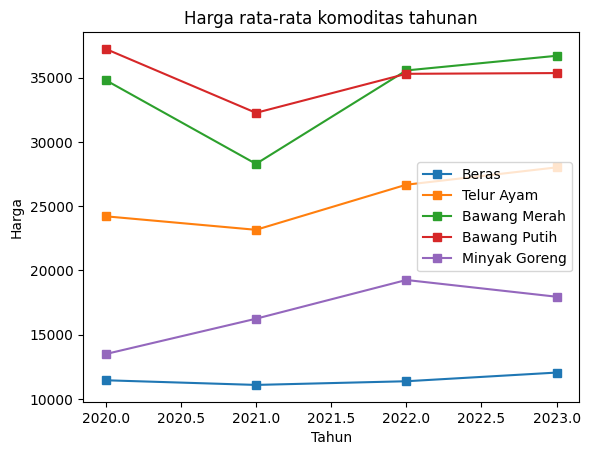

In [ ]:
var = ['Beras','Telur Ayam','Bawang Merah','Bawang Putih','Minyak Goreng']
dfy1 = df.groupby(['Tahun']).mean()[var]
dfy1.plot(marker = 's')
plt.ylabel('Harga')
plt.title('Harga rata-rata komoditas tahunan')

<ipython-input-29-33710fac002e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfy1 = df.groupby(['Tahun']).mean()['Beras']


Text(0.5, 1.0, 'Harga rata-rata tahunan komoditas beras')

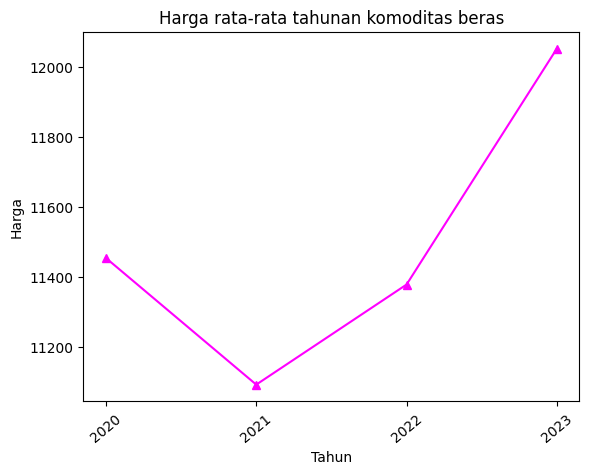

In [ ]:
dfy1 = df.groupby(['Tahun']).mean()['Beras']
dfy1.plot(marker = '^', color = 'magenta')
plt.ylabel('Harga')
plt.xticks([2020, 2021, 2022, 2023 ], rotation=40)
plt.title('Harga rata-rata tahunan komoditas beras')

<ipython-input-30-1b07a8c92348>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfy1 = df.groupby(['Tahun']).mean()['Telur Ayam']


Text(0.5, 1.0, 'Harga rata-rata tahunan komoditas Telur Ayam')

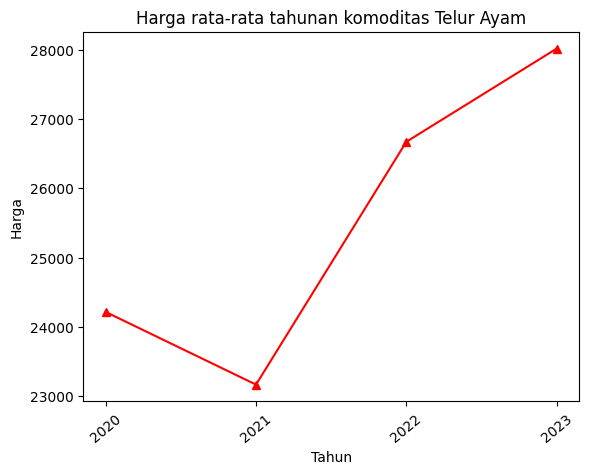

In [ ]:
dfy1 = df.groupby(['Tahun']).mean()['Telur Ayam']
dfy1.plot(marker = '^', color = 'red')
plt.ylabel('Harga')
plt.xticks([2020, 2021, 2022, 2023 ], rotation=40)
plt.title('Harga rata-rata tahunan komoditas Telur Ayam')

<ipython-input-31-3ff61c87c2dc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfy1 = df.groupby(['Bulan']).mean()['Beras']


Text(0.5, 1.0, 'Harga rata-rata bulanan komoditas beras')

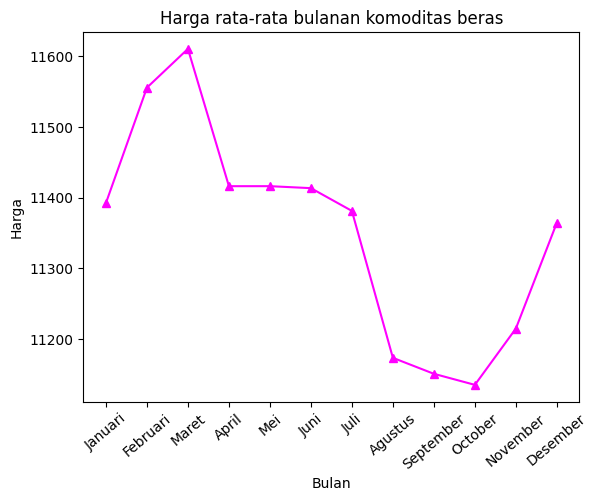

In [ ]:
dfy1 = df.groupby(['Bulan']).mean()['Beras']
dfy1.plot(marker = '^', color = 'magenta')
plt.ylabel('Harga')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret','April','Mei','Juni','Juli','Agustus','September','October','November','Desember'], rotation=40)
plt.title('Harga rata-rata bulanan komoditas beras')

In [ ]:
dfy1 = df.groupby(['Bulan']).mean()['Telur Ayam']
dfy1.plot(marker = '^', color = 'magenta')
plt.ylabel('Harga')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret','April','Mei','Juni','Juli','Agustus','September','October','November','Desember'], rotation=40)
plt.title('Harga rata-rata bulanan komoditas Telur Ayam')

NameError: ignored

In [ ]:
dfy1 = df.groupby(['Bulan']).mean()['Bawang Merah']
dfy1.plot(marker = '^', color = 'magenta')
plt.ylabel('Harga')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret','April','Mei','Juni','Juli','Agustus','September','October','November','Desember'], rotation=40)
plt.title('Harga rata-rata bulanan komoditas Bawang Merah')

In [ ]:
dfy1 = df.groupby(['Bulan']).mean()['Bawang Putih']
dfy1.plot(marker = '^', color = 'magenta')
plt.ylabel('Harga')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret','April','Mei','Juni','Juli','Agustus','September','October','November','Desember'], rotation=40)
plt.title('Harga rata-rata bulanan komoditas Bawang Putih')

In [ ]:
dfy1 = df.groupby(['Bulan']).mean()['Minyak Goreng']
dfy1.plot(marker = '^', color = 'magenta')
plt.ylabel('Harga')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12 ], ['Januari', 'Februari', 'Maret','April','Mei','Juni','Juli','Agustus','September','October','November','Desember'], rotation=40)
plt.title('Harga rata-rata bulanan komoditas Minyak Goreng')

<ipython-input-36-50c2873cd04b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfy1 = df.groupby(['Hari']).mean()['Beras']


Text(0.5, 1.0, 'Harga rata-rata harian komoditas Beras')

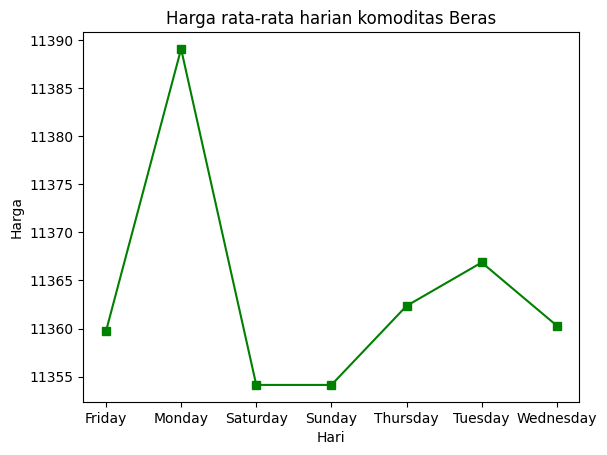

In [ ]:
dfy1 = df.groupby(['Hari']).mean()['Beras']
dfy1.plot(marker = 's', color = 'green')
plt.ylabel('Harga')
plt.title('Harga rata-rata harian komoditas Beras')

<ipython-input-37-4a590a8e49dc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfy1 = df.groupby(['Hari']).mean()['Telur Ayam']


Text(0.5, 1.0, 'Harga rata-rata harian komoditas Telur Ayam')

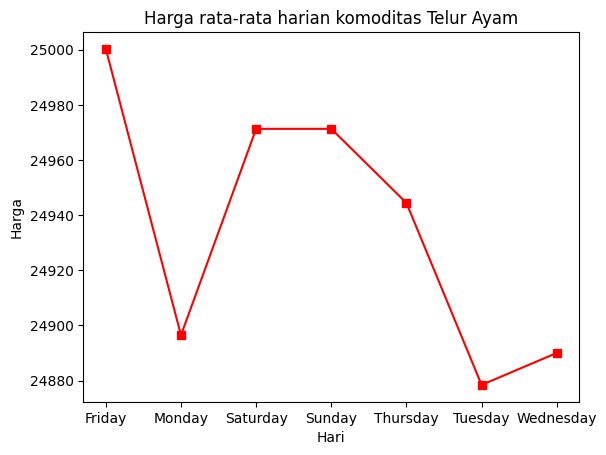

In [ ]:
dfy1 = df.groupby(['Hari']).mean()['Telur Ayam']
dfy1.plot(marker = 's', color = 'red')
plt.ylabel('Harga')
plt.title('Harga rata-rata harian komoditas Telur Ayam')

<ipython-input-38-1297c2b80176>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfy1 = df.groupby(['Hari']).mean()['Bawang Merah']


Text(0.5, 1.0, 'Harga rata-rata harian komoditas Bawang Merah')

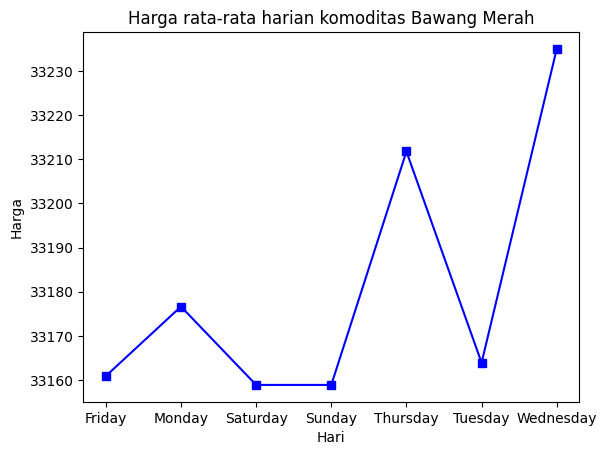

In [ ]:
dfy1 = df.groupby(['Hari']).mean()['Bawang Merah']
dfy1.plot(marker = 's', color = 'blue')
plt.ylabel('Harga')
plt.title('Harga rata-rata harian komoditas Bawang Merah')

<ipython-input-39-0c6049a33de6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfy1 = df.groupby(['Hari']).mean()['Bawang Putih']


Text(0.5, 1.0, 'Harga rata-rata harian komoditas Bawang Putih')

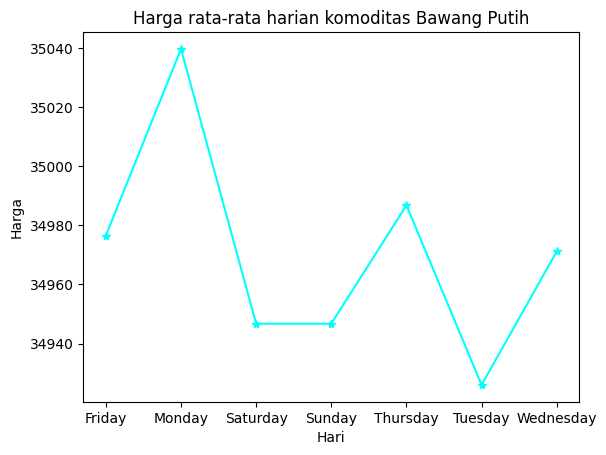

In [ ]:
dfy1 = df.groupby(['Hari']).mean()['Bawang Putih']
dfy1.plot(marker = '*', color = 'cyan')
plt.ylabel('Harga')
plt.title('Harga rata-rata harian komoditas Bawang Putih')

<ipython-input-40-edccdd6b44af>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfy1 = df.groupby(['Hari']).mean()['Minyak Goreng']


Text(0.5, 1.0, 'Harga rata-rata harian komoditas Minyak Goreng')

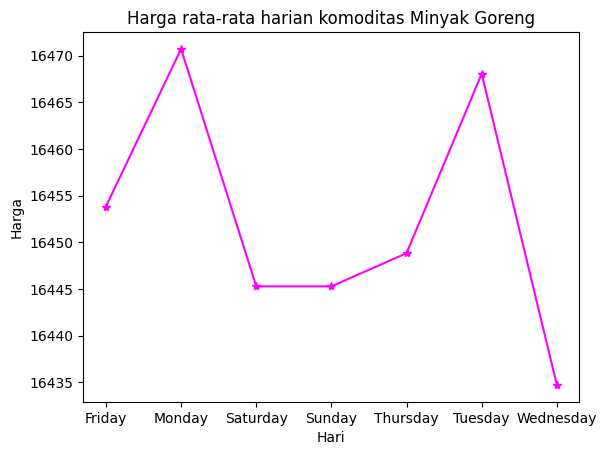

In [ ]:
dfy1 = df.groupby(['Hari']).mean()['Minyak Goreng']
dfy1.plot(marker = '*', color = 'magenta')
plt.ylabel('Harga')
plt.title('Harga rata-rata harian komoditas Minyak Goreng')

Text(0, 0.5, 'Jumlah')

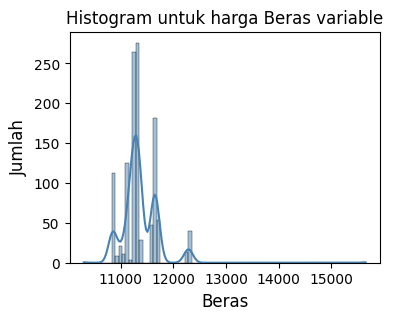

In [ ]:
var1 = 'Beras'
plt.figure(figsize=(4,3), dpi=100)
g = sns.histplot(df, x=var1, kde=True, color='steelblue')
g.set_title("Histogram untuk harga " + var1 + " variable", fontsize=12)
g.set_xlabel(var1, fontsize=12) # set x label
g.set_ylabel('Jumlah', fontsize=12, rotation=90) #set y label

Text(0, 0.5, 'Jumlah')

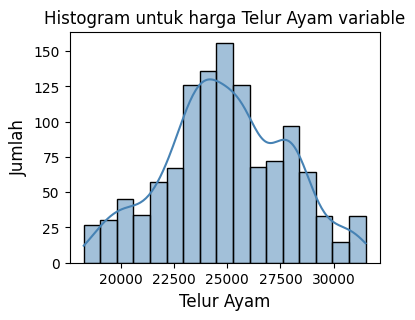

In [ ]:
var1 = 'Telur Ayam'
plt.figure(figsize=(4,3), dpi=100)
g = sns.histplot(df, x=var1, kde=True, color='steelblue')
g.set_title("Histogram untuk harga " + var1 + " variable", fontsize=12)
g.set_xlabel(var1, fontsize=12) # set x label
g.set_ylabel('Jumlah', fontsize=12, rotation=90) #set y label

Text(0, 0.5, 'Jumlah')

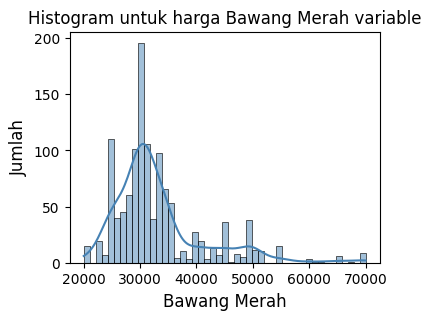

In [ ]:
var1 = 'Bawang Merah'
plt.figure(figsize=(4,3), dpi=100)
g = sns.histplot(df, x=var1, kde=True, color='steelblue')
g.set_title("Histogram untuk harga " + var1 + " variable", fontsize=12)
g.set_xlabel(var1, fontsize=12) # set x label
g.set_ylabel('Jumlah', fontsize=12, rotation=90) #set y label

Text(0, 0.5, 'Jumlah')

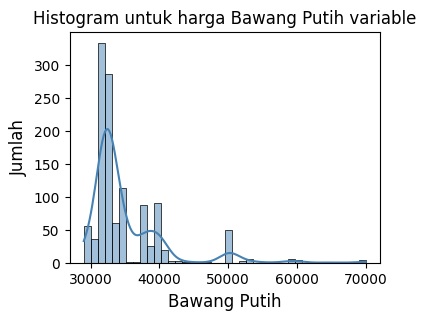

In [ ]:
var1 = 'Bawang Putih'
plt.figure(figsize=(4,3), dpi=100)
g = sns.histplot(df, x=var1, kde=True, color='steelblue')
g.set_title("Histogram untuk harga " + var1 + " variable", fontsize=12)
g.set_xlabel(var1, fontsize=12) # set x label
g.set_ylabel('Jumlah', fontsize=12, rotation=90) #set y label

Text(0, 0.5, 'Jumlah')

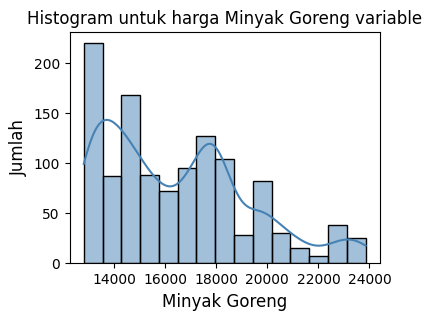

In [ ]:
var1 = 'Minyak Goreng'
plt.figure(figsize=(4,3), dpi=100)
g = sns.histplot(df, x=var1, kde=True, color='steelblue')
g.set_title("Histogram untuk harga " + var1 + " variable", fontsize=12)
g.set_xlabel(var1, fontsize=12) # set x label
g.set_ylabel('Jumlah', fontsize=12, rotation=90) #set y label